In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/zhenglongwu/Documents/GitHub/MSIN0006/Lab 1 Project/data_preparation/data.csv')
data.set_index('date', inplace=True)
data.head()

,pottermore,searches
date,,
2016-01-01,10,5.743677
2016-01-02,11,11.287644
2016-01-03,10,9.034139
2016-01-04,8,2.337842
2016-01-05,8,1.214174


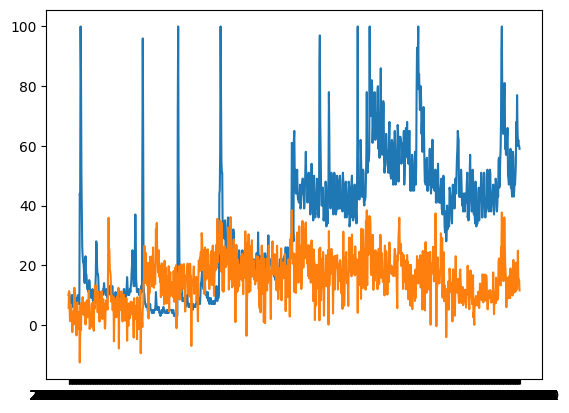

In [2]:
plt.plot(data)
plt.show()

In [3]:
data['pottermore_log_delta'] = np.log1p(data['pottermore'].pct_change())
data['searches_log_delta'] = np.log1p(data['searches'].pct_change())

/Users/zhenglongwu/Documents/GitHub/MSIN0006/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


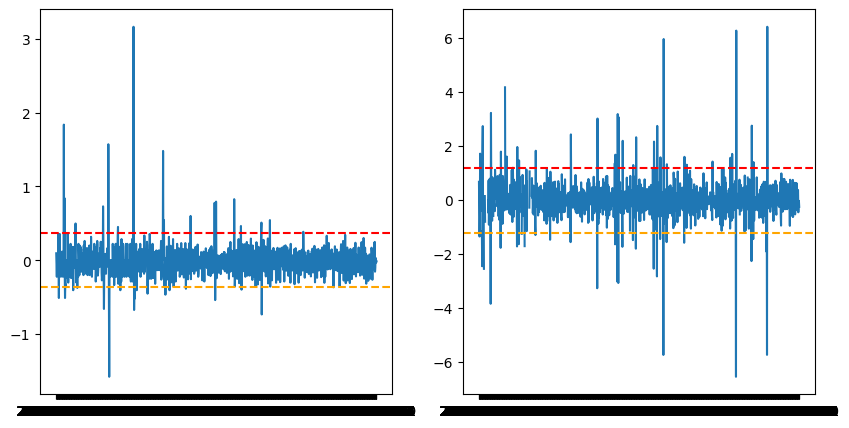

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(data['pottermore_log_delta'])
stat_pottermore = data['pottermore_log_delta'].describe()
axes[0].axhline(y=stat_pottermore['25%']-(1.5*(stat_pottermore['75%']-stat_pottermore['25%'])), 
                ls='--',color='orange', 
                label='1.5 IQR from 1st quartile')
axes[0].axhline(y=stat_pottermore['75%']+(1.5*(stat_pottermore['75%']-stat_pottermore['25%'])), 
                ls='--',
                color='red', 
                label='1.5 IQR from 3rd quartile')
axes[1].plot(data['searches_log_delta'])
stat_searches = data['searches_log_delta'].describe()
axes[1].axhline(y=stat_searches['25%']-(1.5*(stat_searches['75%']-stat_searches['25%'])), 
                ls='--',color='orange', 
                label='1.5 IQR from 1st quartile')
axes[1].axhline(y=stat_searches['75%']+(1.5*(stat_searches['75%']-stat_searches['25%'])), 
                ls='--',
                color='red', 
                label='1.5 IQR from 3rd quartile')

In [ ]:
third_quart_pottermore = stat_pottermore['25%']-(1.5*(stat_pottermore['75%']-stat_pottermore['25%']))
third_quart_seaches = stat_searches['75%']+(1.5*(stat_searches['75%']-stat_searches['25%']))

outlier_dates_pottermore = [index for index in data.index if data.loc[index, 'pottermore'] > third_quart_pottermore] 
outlier_dates_searches = [index for index in data.index if data.loc[index, 'searches'] > third_quart_seaches] 

print(outlier_dates_pottermore)
print(outlier_dates_searches)

In [ ]:
lag_corr = []

for lag in range(0, 100, 1):
    lag_corr.append(data['pottermore'].corr(data['searches'].shift(lag)))

print(max(lag_corr), lag_corr.index(max(lag_corr)))

In [ ]:
delta_lag_corr = []

for lag in range(0, 100, 1):
    delta_lag_corr.append(data['pottermore_log_delta'].corr(data['searches_log_delta'].shift(lag)))

print(max(delta_lag_corr), delta_lag_corr.index(max(delta_lag_corr)))